In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
homicidios = pd.read_excel('datasets/excel/homicidios.xlsx',sheet_name=0)
homicidios_victimas = pd.read_excel('datasets/excel/homicidios.xlsx',sheet_name=2)
lesiones = pd.read_excel('datasets/excel/lesiones.xlsx')
lesiones_victimas = pd.read_excel('datasets/excel/lesiones.xlsx', sheet_name=2)
homicidios.columns = [x.lower() for x in list(homicidios.columns)]
lesiones.rename(columns={'latutid':'latitud'}, inplace=True)

# Informacion, formato y datos duplicados de los dataframes

In [6]:
homicidios.info()
homicidios[homicidios.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   n_victimas             696 non-null    int64         
 2   fecha                  696 non-null    datetime64[ns]
 3   aaaa                   696 non-null    int64         
 4   mm                     696 non-null    int64         
 5   dd                     696 non-null    int64         
 6   hora                   696 non-null    object        
 7   hh                     696 non-null    object        
 8   lugar_del_hecho        696 non-null    object        
 9   tipo_de_calle          696 non-null    object        
 10  calle                  695 non-null    object        
 11  altura                 129 non-null    float64       
 12  cruce                  525 non-null    object        
 13  direc

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado


### Victimas de homicidios

In [7]:
homicidios_victimas.info()
homicidios_victimas[homicidios_victimas.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


### Lesiones

In [8]:
lesiones.info()
lesiones[lesiones.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


### Victimas de lesiones

In [9]:
lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


Duplicados de victimas de lesiones

Tenemos que tener en cuenta que en los casos del dataframe de victimas puede haber mas de una victima dentro de un mismo hecho por lo que no podemos guiarnos solo por el ID del hecho, para eso lo analizaremos por medio de un subset y tener cuidado con los resultados

In [10]:
lesiones_victimas[lesiones_victimas.duplicated(subset=['ID hecho', 'SEXO', 'EDAD_VICTIMA'])].value_counts()

ID hecho         AAA   MM  DD  FECHA       VEHICULO_VICTIMA    SEXO   EDAD_VICTIMA  GRAVEDAD
LC-2021-0552311  2021  11  5   2021-11-05  TRANSPORTE PUBLICO  SD     SD            SD          7
LC-2019-0049800  2019  1   23  2019-01-23  sd                  Mujer  12            SD          6
LC-2020-0586400  2020  10  28  2020-10-28  SD                  sd     sd            sd          4
LC-2019-0083523  2019  2   8   2019-02-08  sd                  Mujer  SD            SD          4
LC-2020-0204368  2020  4   20  2020-04-20  TRANSPORTE PUBLICO  sd     sd            sd          4
                                                                                               ..
LC-2019-0188422  2019  3   26  2019-03-26  sd                  Varon  31            SD          1
LC-2019-0188368  2019  3   26  2019-03-26  sd                  Varon  28            SD          1
LC-2019-0186795  2019  3   26  2019-03-26  sd                  Mujer  48            SD          1
LC-2019-0185123  2019  3 

Podemos observar que si bien hay duplicados como los primeros que coinciden en varios campos y resulta dudoso, tambien hay algunos que si bien poseen coincidencias no necesariamente deberian ser catalogados como duplicados

# Revision de valores nulos o faltantes

Comenzamos buscando las posibles nomenclaturas de datos faltantes que pueden ser ('SD','sd','SD-SD')

### Dataframe homicidios

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,cruce,dirección normalizada,comuna,xy (caba),pos x,pos y,participantes,victima,acusado,Total de nulos
0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,5,9,23,40


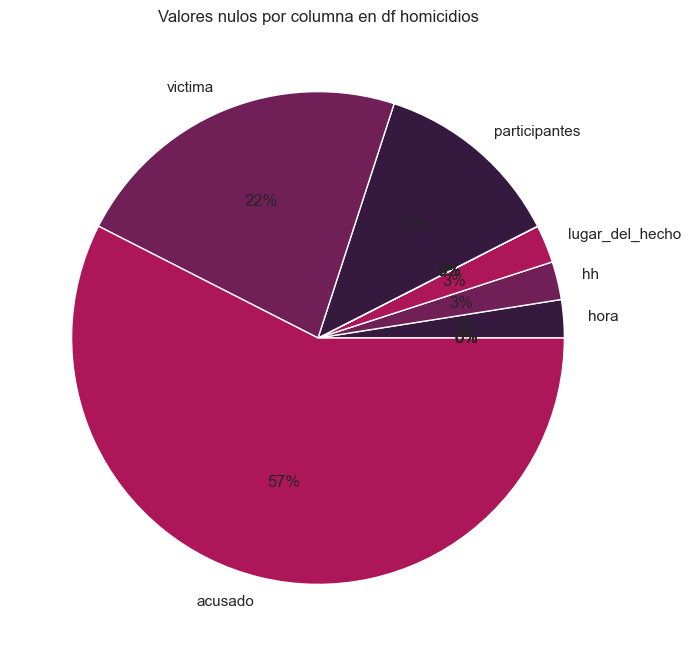

In [11]:
df = (homicidios.isin(['SD','sd','SD-SD'])).sum()
df.plot.pie(title='Valores nulos por columna en df homicidios',figsize=(12,8),autopct = '%0.0f%%')
df = df.to_frame().transpose()
df['Total de nulos'] = df.sum(axis=1)
df

### Dataframe victimas de homicidio

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Total de nulos
0,0,0,0,0,0,11,9,6,53,68,147


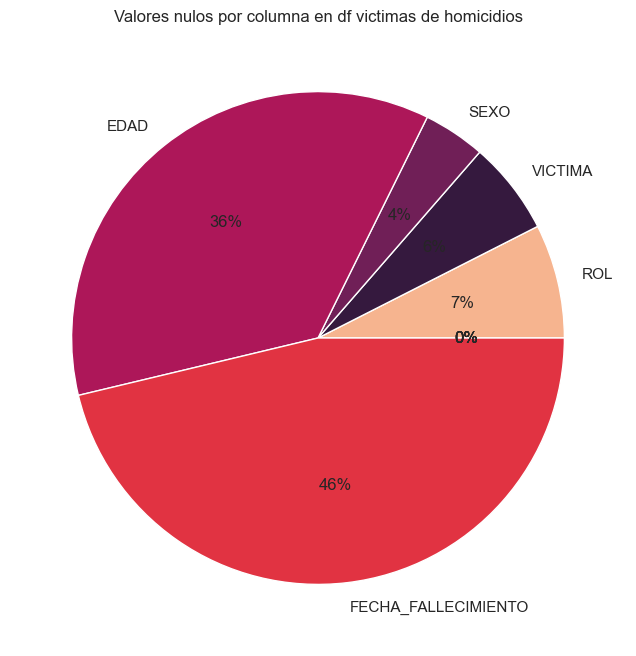

In [12]:
df = (homicidios_victimas.isin(['SD','sd','SD-SD'])).sum()
df.plot.pie(title='Valores nulos por columna en df victimas de homicidios',figsize=(12,8),autopct = '%0.0f%%')
df = df.to_frame().transpose()
df['Total de nulos'] = df.sum(axis=1)
df

### Dataframe lesiones

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad,Total de nulos
0,0,0,0,0,0,0,9,4,10815,846,...,10733,15288,10535,8511,12543,11801,12708,11353,23139,161256


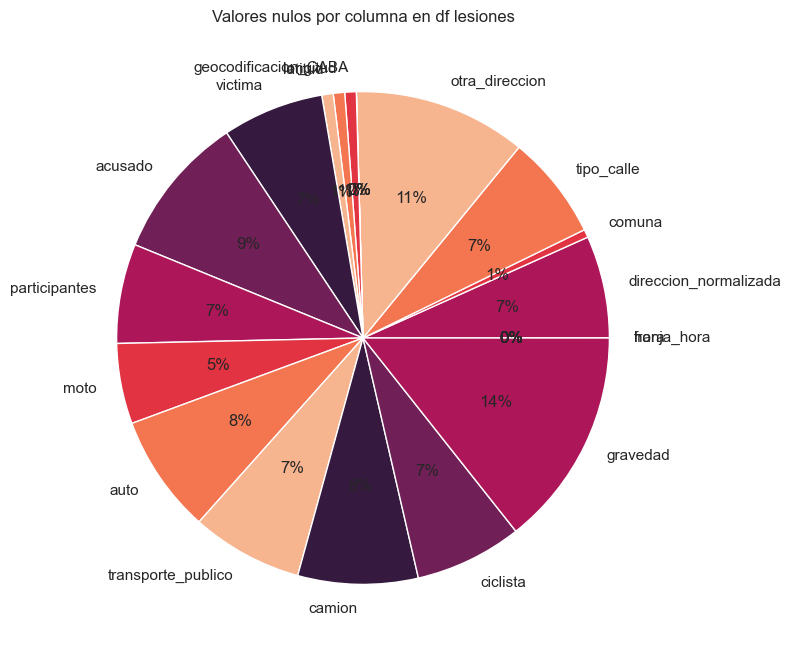

In [13]:
df = (lesiones.isin(['SD','sd','SD-SD'])).sum()
df.plot.pie(title='Valores nulos por columna en df lesiones',figsize=(12,8),autopct = '%0.0f%%')
df = df.to_frame().transpose()
df['Total de nulos'] = df.sum(axis=1)
df

### Dataframe victimas de lesiones

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Total de nulos
0,0,0,0,0,0,11,9,6,53,68,147


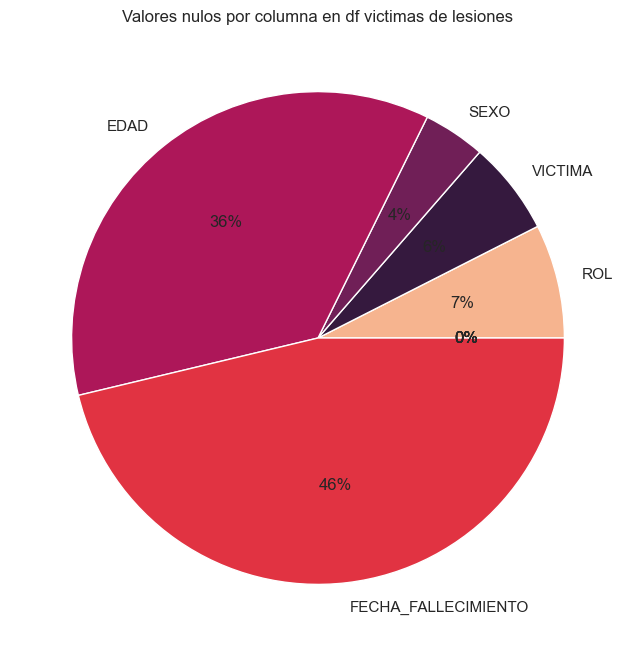

In [14]:
df = (homicidios_victimas=='SD').sum()
df.plot.pie(title='Valores nulos por columna en df victimas de lesiones',figsize=(12,8),autopct = '%0.0f%%')
df = df.to_frame().transpose()
df['Total de nulos'] = df.sum(axis=1)
df

# Revision de Outliers

Vamos a analizar posibles outliers en los datasets analizaremos las columnas numericas que podrian afectar nuestro posterior analisis.

#### Dataframe victimas de homicidio

<Axes: title={'center': 'Revision outliers de edad'}, xlabel='EDAD'>

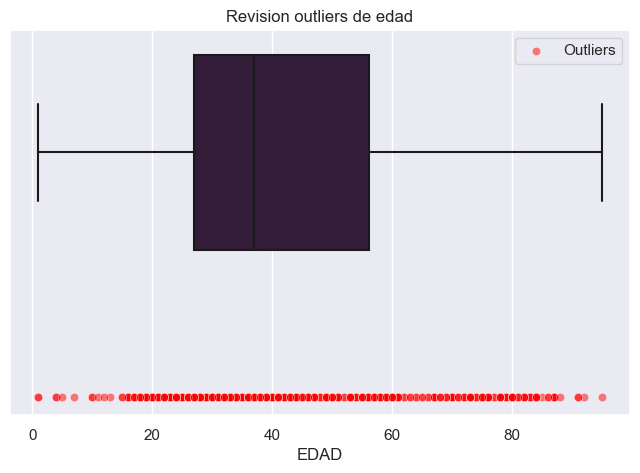

In [15]:
x = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')

plt.figure(figsize=(8,5))
plt.title('Revision outliers de edad')
sns.boxplot(x=x)
sns.scatterplot(x=x, y=[1] * len(x), marker='o', color='red', alpha=0.5, label='Outliers')

Podemos ver que no hay valores relevantes clasificados como outliers en nuestro dataset y no afectaran nuestra investigacion

### Dataframe victimas de lesiones

<Axes: title={'center': 'Revision outliers de edad'}, xlabel='EDAD_VICTIMA'>

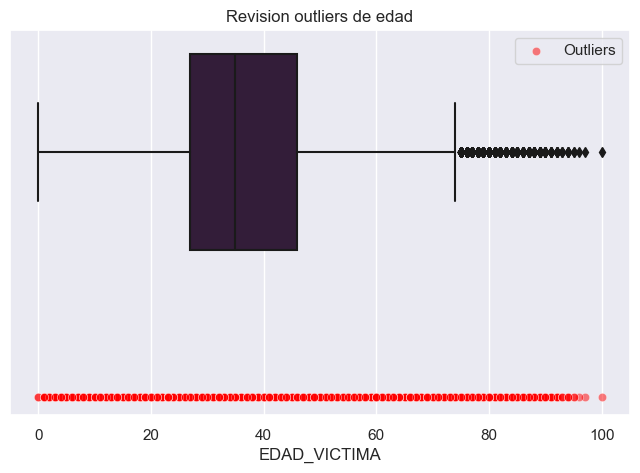

In [16]:
x = pd.to_numeric(lesiones_victimas['EDAD_VICTIMA'], errors='coerce')

plt.figure(figsize=(8,5))
plt.title('Revision outliers de edad')
sns.boxplot(x=x)
sns.scatterplot(x=x, y=[1] * len(x), marker='o', color='red', alpha=0.5, label='Outliers')

Si bien hay outliers en la columna de edad debemos determinar si estas realmente son un error o simplemente un caso atipico en la realidad de los datos. En este caso las edades presentadas no son valores irreales por lo que podemos aceptarlos como datos validos en nuestro dataset

# Distribucion de datos

## Por año

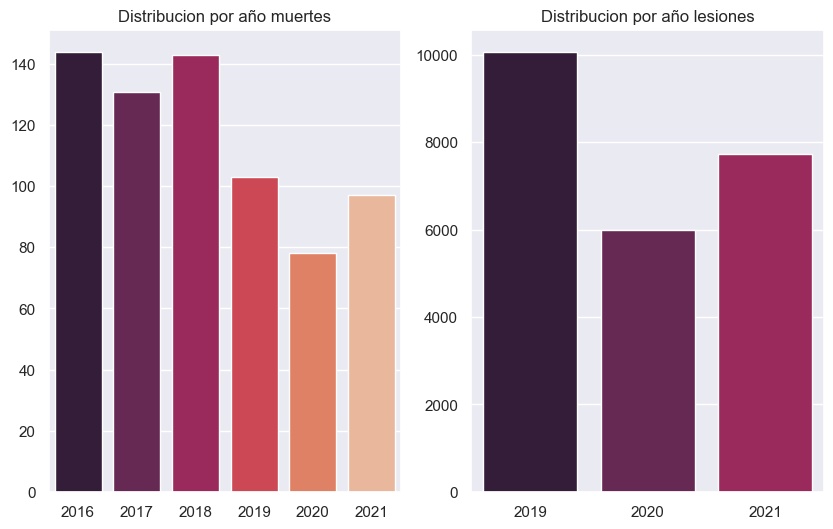

In [17]:
sns.set(palette='rocket')
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title('Distribucion por año muertes')
sns.barplot(data=homicidios, 
            x= list(homicidios['aaaa'].drop_duplicates()),
            y=list(homicidios.groupby(['aaaa']).count()['id']))
plt.subplot(1,2,2)
plt.title('Distribucion por año lesiones')
sns.barplot(data=lesiones, 
            x= list(lesiones['aaaa'].drop_duplicates()),
            y=list(lesiones.groupby(['aaaa']).count()['id']))

plt.show()

## Por mes

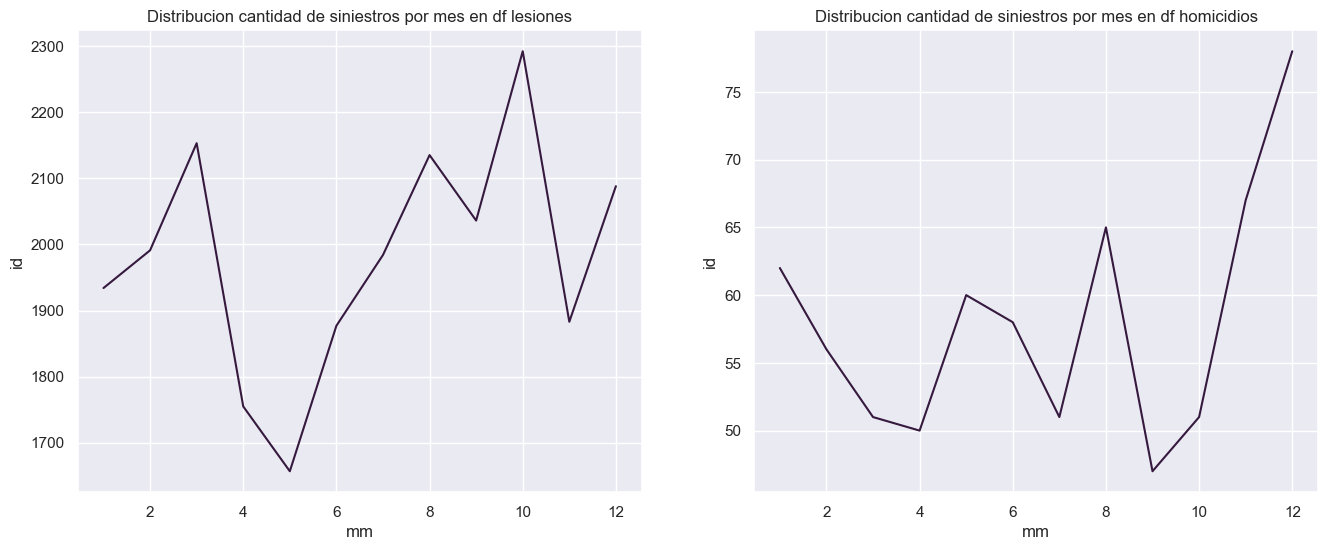

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Distribucion cantidad de siniestros por mes en df lesiones')
sns.lineplot(data=lesiones.groupby('mm').count()['id'].reset_index(), x='mm',y='id')

plt.subplot(1,2,2)
plt.title('Distribucion cantidad de siniestros por mes en df homicidios')
sns.lineplot(data=homicidios.groupby('mm').count()['id'].reset_index(), x='mm',y='id')
plt.show()

En los graficos podemos analizar el comportamiento de ambos dataframes los cuales tienen aumentos o disminuciones de casos a lo largo del año y no necesariamente estan ligados los unos a los otros. Por ejemplo vemos que en el mes 3 los siniestros con lesiones poseen un pico de casos mientras que hay una disminucion en homicidios. De la misma manera un comportamiento inverso entre los dataframes se presenta a partir del mes 10

### Por dia

In [19]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import locale


locale.setlocale(locale.LC_TIME, 'es_ES')

#Observamos por valores que no cumplan con el tipo de dato que trabajaremos
#En este caso es posible transformarlo por lo que trabajaremos
df = lesiones[~lesiones['fecha'].apply(lambda x: True if isinstance(x, datetime.datetime) else False)]
date = df['fecha'].values[0]
df['fecha'] = datetime.datetime.strptime(date, '%m/%d/%Y')
lesiones[~lesiones['fecha'].apply(lambda x: True if isinstance(x, datetime.datetime) else False)] = df

#Ahora si podemos trabajar tranquilamente con las fechas, procederemos a crear un campo nuevo con los dias del siniestro
lesiones['nombre_dia'] = lesiones['fecha'].apply(lambda date: date.strftime('%A'))
homicidios['nombre_dia'] = homicidios['fecha'].apply(lambda date: date.strftime('%A'))


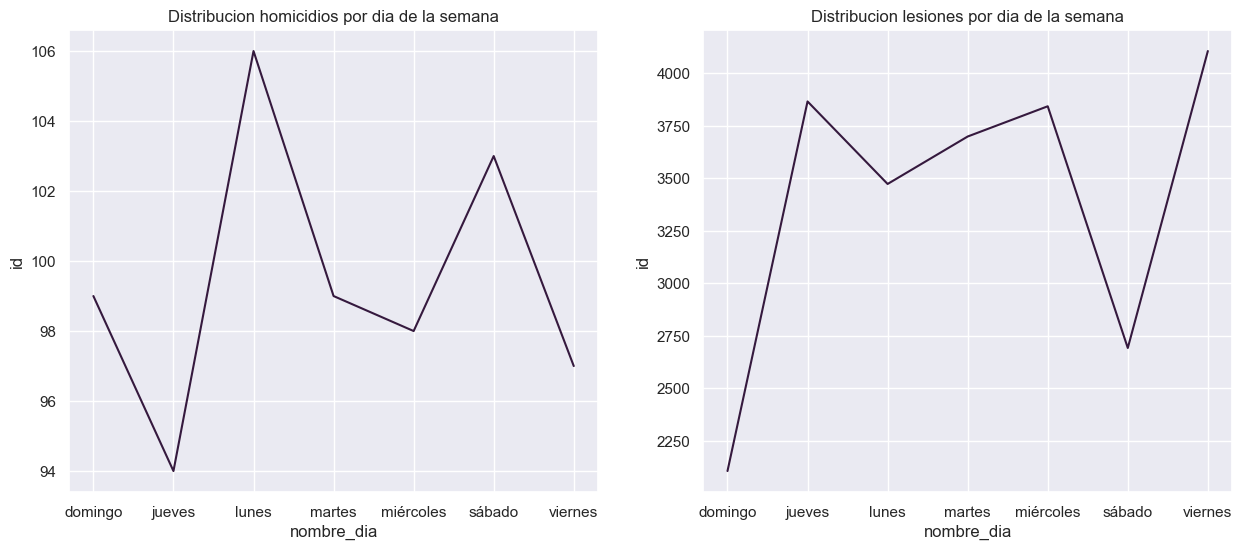

In [20]:
### Y ahora procedemos a graficar con esos resultados
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('Distribucion homicidios por dia de la semana')
sns.lineplot(data=homicidios.groupby('nombre_dia').count()['id'].reset_index(),
            x='nombre_dia', y='id')

plt.subplot(1,2,2)
plt.title('Distribucion lesiones por dia de la semana')
sns.lineplot(data=lesiones.groupby('nombre_dia').count()['id'].reset_index(),
            x='nombre_dia',y='id')

plt.show()


Podemos observar que los dias lunes y sabados se producen los picos de casos en el dataframe de homicidios, mientras que en el de lesiones se producen los jueves, miercoles y viernes.

### Por hora

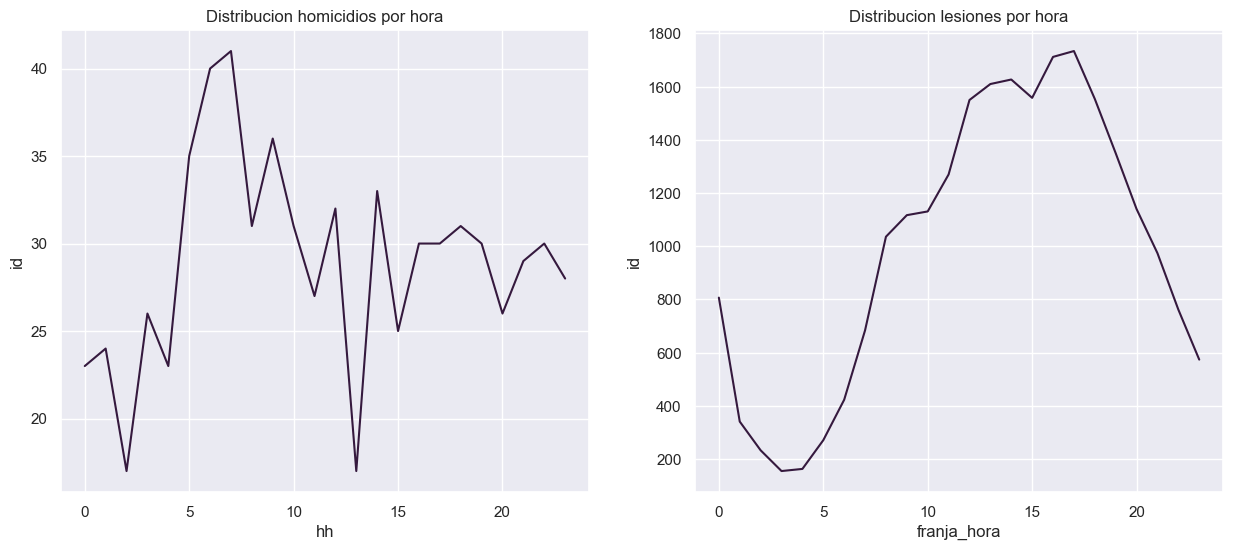

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('Distribucion homicidios por hora')
sns.lineplot(data=homicidios.groupby('hh').count()['id'].reset_index()[0:24],
            x='hh', y='id')

plt.subplot(1,2,2)
plt.title('Distribucion lesiones por hora')
sns.lineplot(data=lesiones.groupby('franja_hora').count()['id'].reset_index()[0:24],
            x='franja_hora',y='id')

plt.show()

Vemos que las lesiones son producidas en horas de la tarde mientras que la mayor cantidad de homicidios son causados a la mañana o madrugada lo cual podria darnos algun indicio de las posibles causas de los siniestros

### Mapa de calor dias y horarios

##### Mapa de calor de lesiones

In [22]:
aux_df = lesiones[['franja_hora','nombre_dia']]
aux_df['franja_hora'].replace('sd', None, inplace=True)
aux_df.dropna(inplace=True)
pivot = aux_df.pivot_table(index='nombre_dia', columns='franja_hora', aggfunc='size', fill_value=0)

#Reordeno el pivot
pivot = pivot.transpose()[['lunes','martes','miércoles','jueves','viernes','sábado','domingo']].transpose()

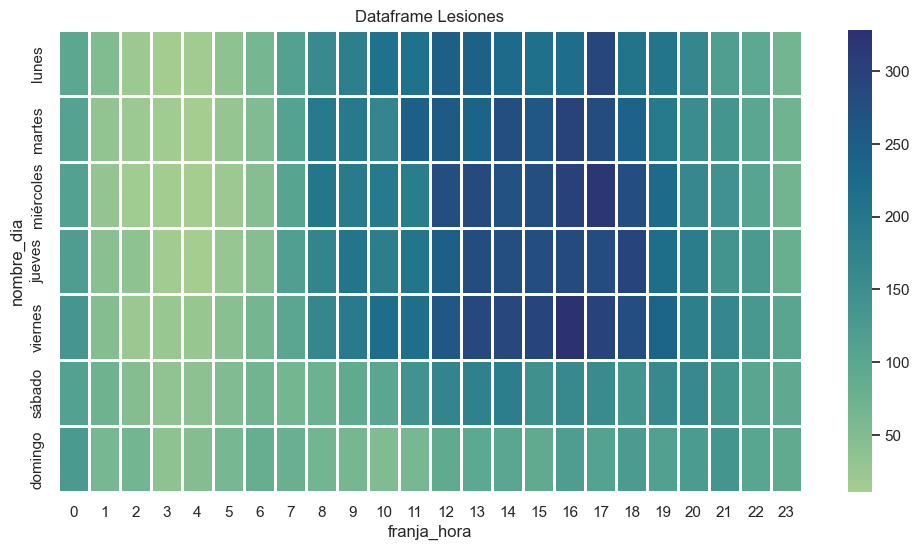

In [23]:
plt.figure(figsize=(12,6))
plt.title('Dataframe Lesiones')
sns.heatmap(pivot, 
            linewidths = 0.75, 
            cmap='crest'
)

plt.show()

##### Mapa de calor para dataframe homicidios

In [24]:
aux_df = homicidios[['hh','nombre_dia']]
aux_df.replace('SD', None, inplace=True)
aux_df.dropna(inplace=True)
pivot = aux_df.pivot_table(index='nombre_dia', columns='hh', aggfunc='size', fill_value=0)
#Reordeno el pivot
pivot = pivot.transpose()[['lunes','martes','miércoles','jueves','viernes','sábado','domingo']].transpose()

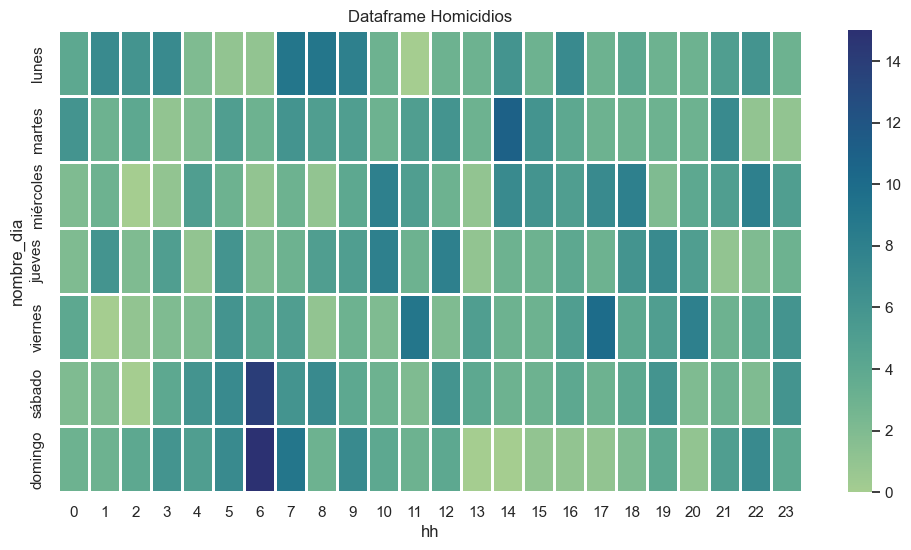

In [25]:
plt.figure(figsize=(12,6))
plt.title('Dataframe Homicidios')
sns.heatmap(pivot, 
            linewidths = 0.75, 
            cmap='crest'
)

plt.show()

En este caso al realizar las correlaciones entre horarios y dias vemos que en el dataframe de lesiones la gran mayoria de casos se producen dentro de horarios laborales los dias de semana por lo que podemos sospechar que sean producto del transito normal de la gente, sus trabajos y otros fines. Por otro lado el dataframe de homicidios nos muestra una alta correlacion entre los dias de semana y los horarios de la madrugada, por lo que podemos suponer que sus causas se puede deber a irresponsabilidad del volante producto de fiestas o sustancias que alteran a los conductores

### Por tipo de vehiculo

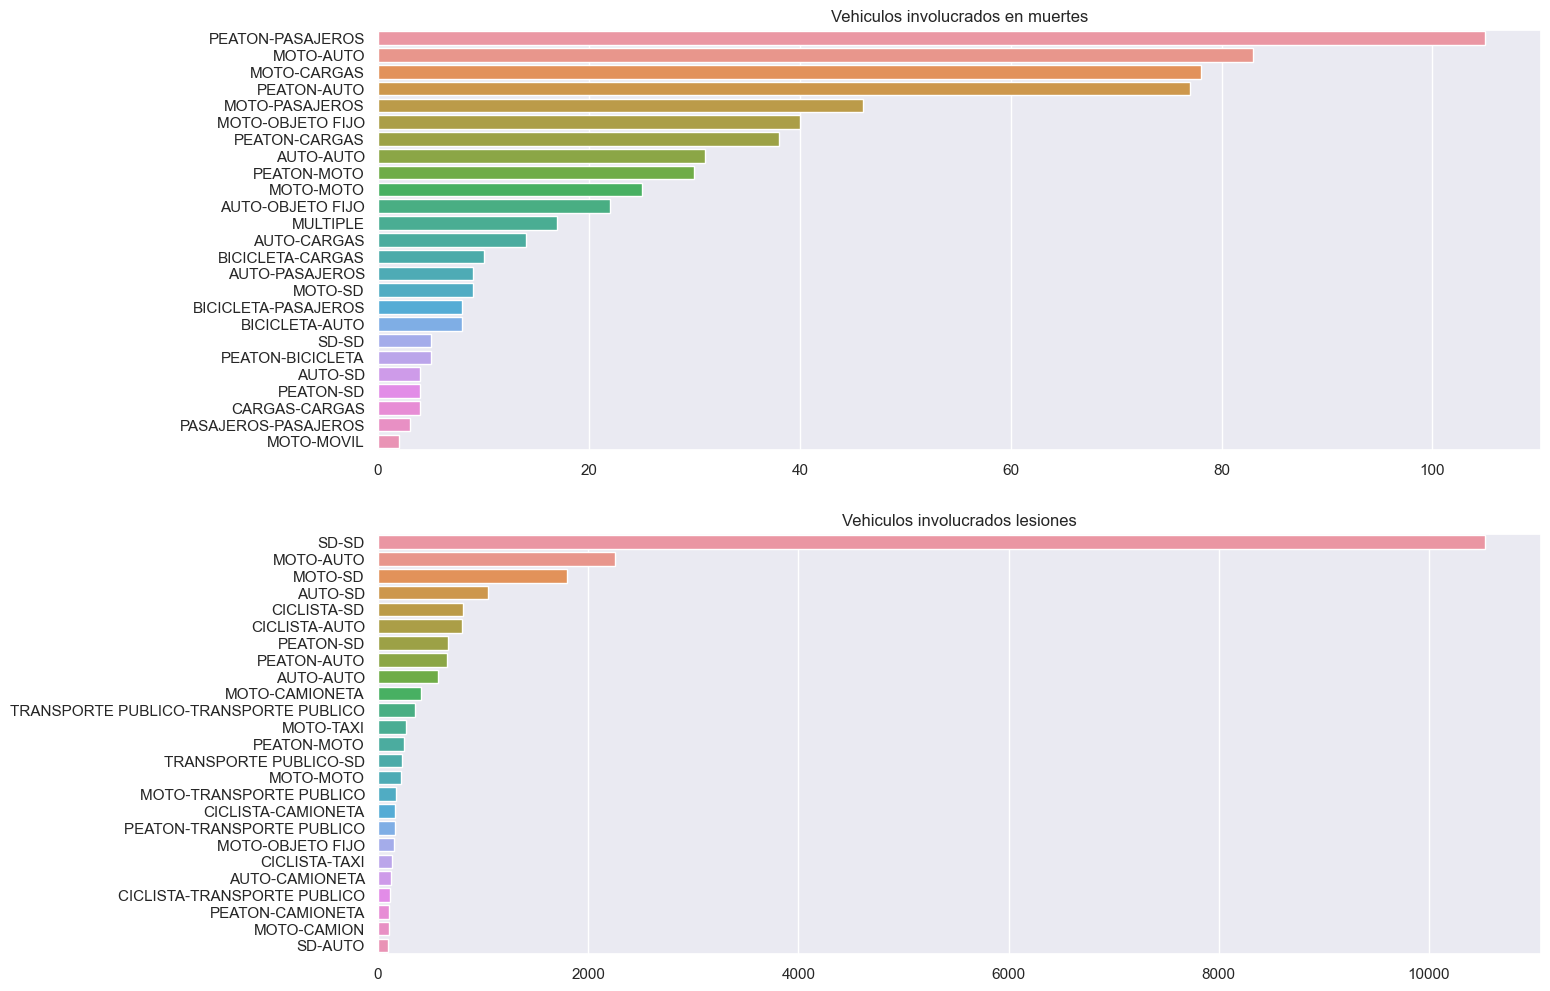

In [26]:
sns.set(palette='rocket')
plt.figure(figsize=(15, 12))
plt.subplot(2,1,1)
plt.title('Vehiculos involucrados en muertes')
sns.barplot(data=homicidios, 
            x= list(homicidios.groupby('participantes').count().sort_values('id',ascending=False)['id'].head(25)),
            y=list(homicidios.groupby('participantes').count().sort_values('id',ascending=False).head(25).index))
plt.subplot(2,1,2)
plt.title('Vehiculos involucrados lesiones')
sns.barplot(data=lesiones, 
            x= list(lesiones.groupby('participantes').count().sort_values('id',ascending=False)['id'].head(25)),
            y=list(lesiones.groupby('participantes').count().sort_values('id',ascending=False)['id'].head(25).index))

plt.show()

Vemos que la mayoria de homicidios se producen sobre victimas que no tienen la seguridad que posee un vehiculo como un automovil, suelen ser peatones o motos. Por otro lado las lesiones tambien son en gran cantidad producidas por un siniestro que involucra una moto por lo que vamos a averiguar si bien esto es producto de imprudencia por parte de estos conductores o bien son victimas de un menosprescio por parte de conductores de automotores de mayor tamaño que no poseen la preocupacion de sufrir las mismas consecuencias que ellos

### Victimas de accidentes

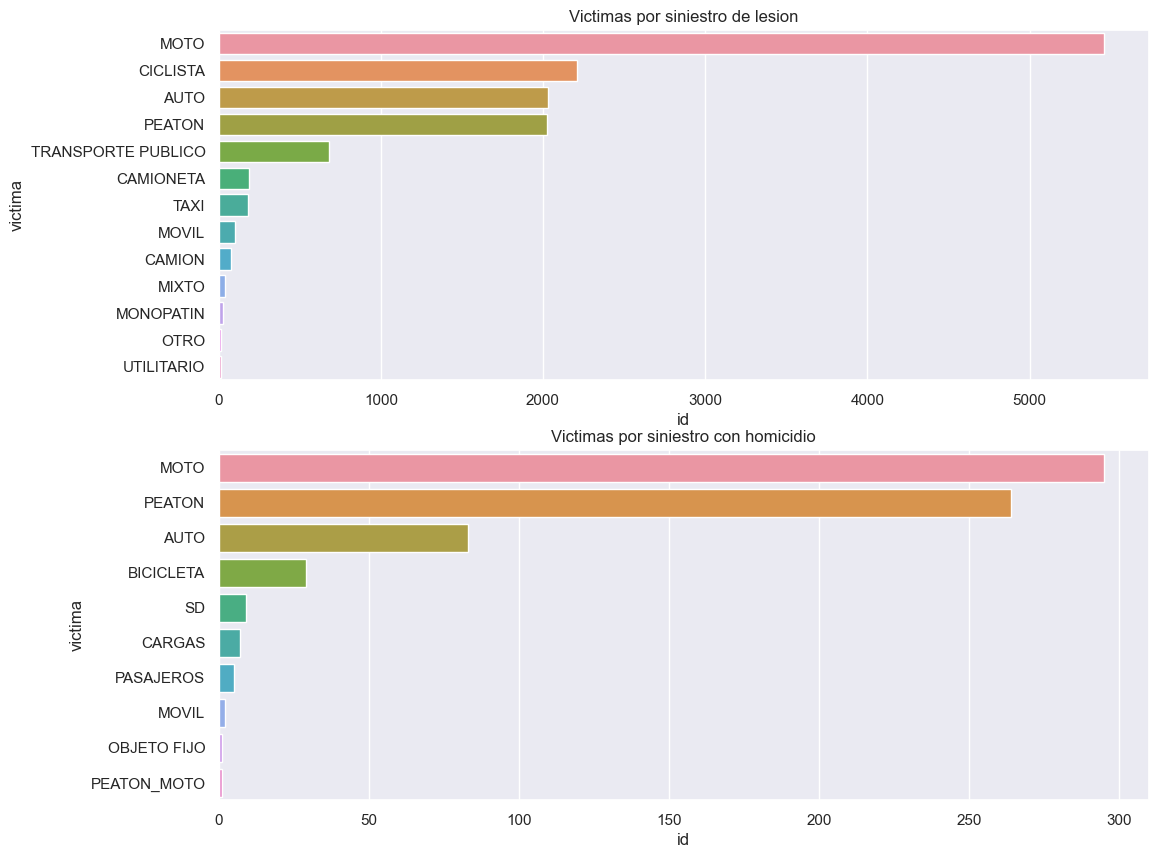

In [27]:
#Vamos a eliminar los datos faltantes 
aux_df = lesiones[['victima','id']]
aux_df['victima'].replace('SD',None,inplace=True)
aux_df.dropna(inplace=True)

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title('Victimas por siniestro de lesion')
sns.barplot(data=aux_df.groupby('victima').count().reset_index().sort_values('id',ascending=False),
            x='id',
            y='victima'
           )

plt.subplot(2,1,2)
plt.title('Victimas por siniestro con homicidio')
aux_df = homicidios[['victima','id']]
sns.barplot(data=aux_df.groupby('victima').count().reset_index().sort_values('id',ascending=False),
            x='id',
            y='victima'
           )

plt.show()

Podemos ver que en ambos casos los motociclistas lideran la tabla de victimas en los siniestros. A continuacion analizaremos los culpables de estos para ver que puesto cumplen alli

### Acusados por siniestro

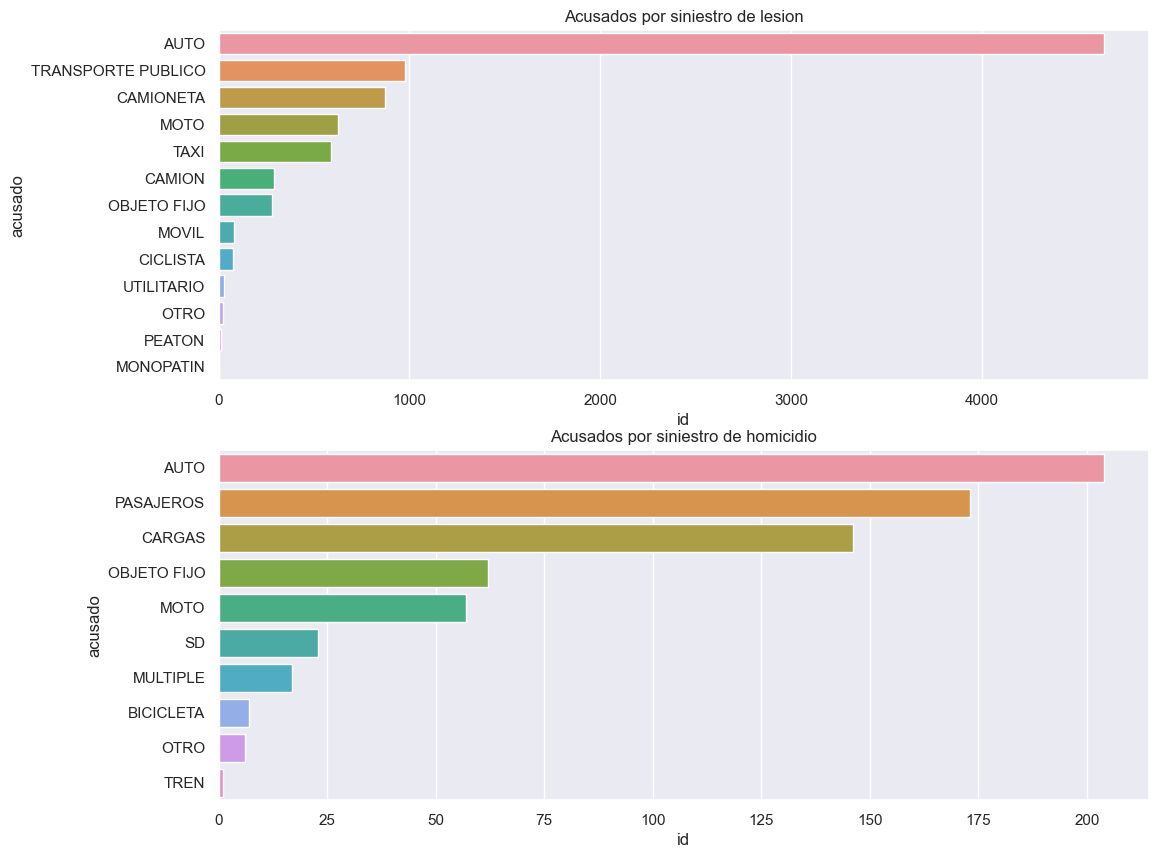

In [28]:
aux_df = lesiones[['acusado','id']]
aux_df['acusado'].replace('SD',None,inplace=True)
aux_df.dropna(inplace=True)

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Acusados por siniestro de lesion')
sns.barplot(data=aux_df.groupby('acusado').count().reset_index().sort_values('id',ascending=False),
            x='id',
            y='acusado'
           )


aux_df = homicidios[['acusado','id']]
plt.subplot(2,1,2)
plt.title('Acusados por siniestro de homicidio')

sns.barplot(data=aux_df.groupby('acusado').count().reset_index().sort_values('id',ascending=False),
            x='id',
            y='acusado'
           )

plt.show()

Vemos en este caso que los vehiculos de mayor tamaño como autos, transportes de carga, transportes publicos o camionetas son los que lideran la tabla por lo que podemos concluir que los motociclistas son las principales victimas de los siniestros producto de la imprudencia al volante por parte de conductores con vehiculos de mayor calibre.

### Por genero

Como podemos apreciar, hay varias nomenclaturas para los generos por lo que las vamos a simplificar a continuacion

In [29]:
print(lesiones_victimas['SEXO'].value_counts())

lesiones_victimas['SEXO'] = lesiones_victimas['SEXO'].apply(lambda x: x.strip().lower())
lesiones_victimas['SEXO'] = lesiones_victimas['SEXO'].apply(lambda x: 'masculino' if x=='varon' else 'femenino' if x=='mujer' else 'sd')
print('Normalizamos los valores de genero')
print(lesiones_victimas['SEXO'].value_counts())

SEXO
Varon     16796
Mujer      8246
SD         1929
sd          299
varon       226
MUJER        62
mujer        46
Mujer         1
Name: count, dtype: int64
Normalizamos los valores de genero
SEXO
masculino    17022
femenino      8355
sd            2228
Name: count, dtype: int64


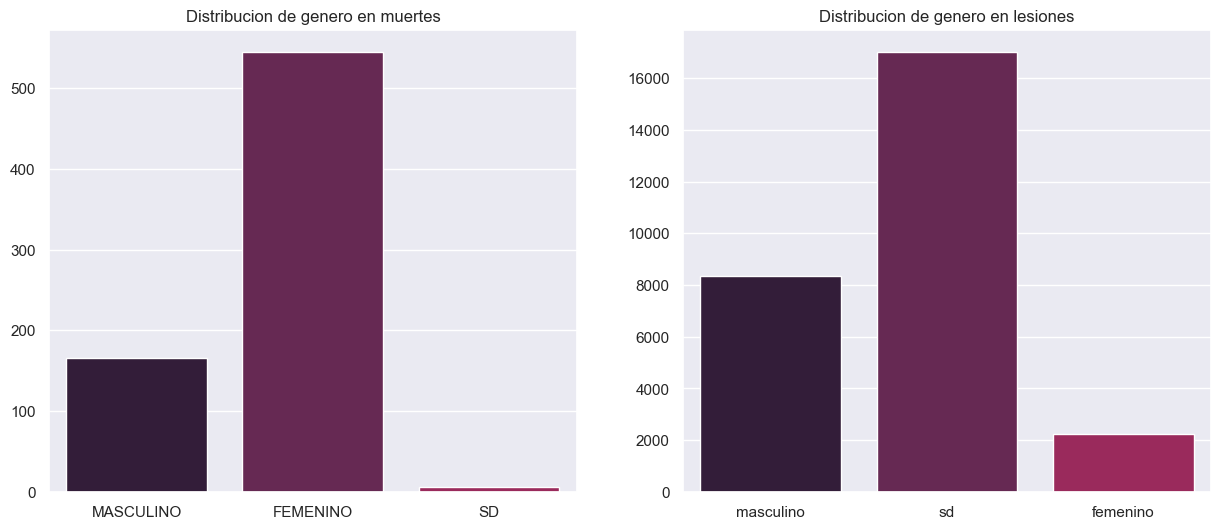

In [30]:
homicidios_victimas.loc[homicidios_victimas['SEXO'] == 'sd', 'SEXO'] = None


plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('Distribucion de genero en muertes')
sns.barplot( 
        x=list(homicidios_victimas['SEXO'].drop_duplicates().dropna()),
           y=list(homicidios_victimas.groupby('SEXO').count()['ID_hecho']))

plt.subplot(1,2,2)
plt.title('Distribucion de genero en lesiones')
sns.barplot( 
        x=list(lesiones_victimas['SEXO'].drop_duplicates().dropna()),
           y=list(lesiones_victimas.groupby('SEXO').count()['ID hecho']))
plt.show()

### Por rango etario

Vamos a normalizar nuevamente la notacion de valores faltantes y gravedad en victimas de lesiones

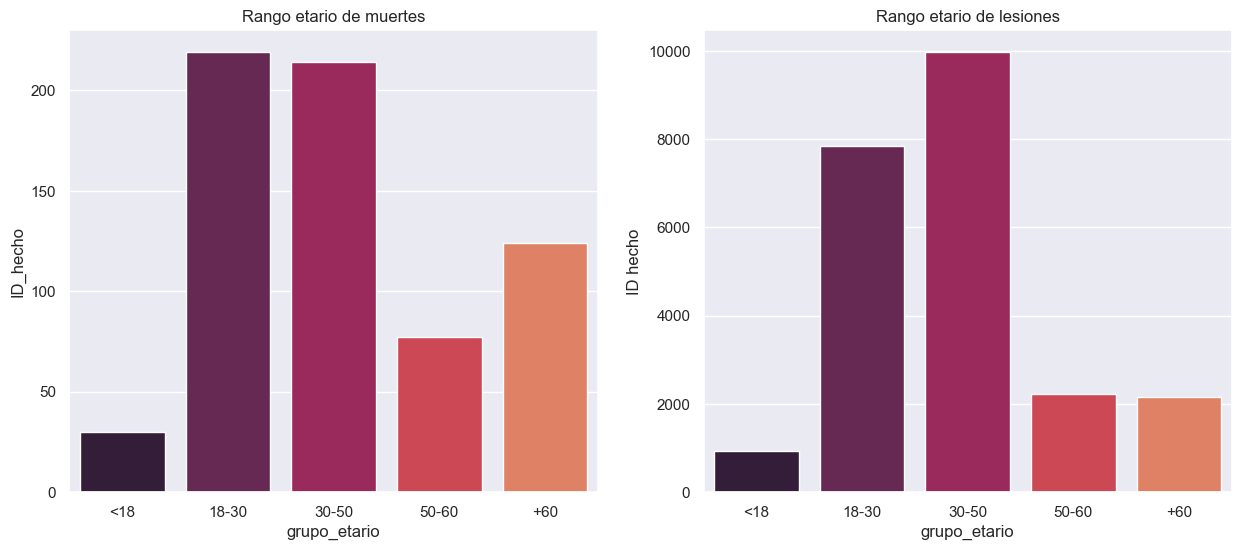

In [31]:
homicidios_victimas.loc[homicidios_victimas['EDAD'].isin(['SD','sd']), 'EDAD'] = None
lesiones_victimas.loc[lesiones_victimas['EDAD_VICTIMA'].isin(['SD','sd']), 'EDAD_VICTIMA'] = None

plt.figure(figsize=(15,6))
bins = [0,18,30,50,60,100]
labels = ['<18','18-30','30-50','50-60','+60']
homicidios_victimas['grupo_etario'] = pd.cut(homicidios_victimas['EDAD'].dropna().astype(int),
                                             bins=bins,
                                            labels=labels)

lesiones_victimas['grupo_etario'] = pd.cut(lesiones_victimas['EDAD_VICTIMA'].dropna().astype(int),
                                             bins=bins,
                                            labels=labels)

plt.subplot(1,2,1)
plt.title('Rango etario de muertes')
sns.barplot(data=homicidios_victimas.groupby('grupo_etario').count()['ID_hecho'].reset_index(),
           x='grupo_etario', y='ID_hecho')


plt.subplot(1,2,2)
plt.title('Rango etario de lesiones')
sns.barplot(data=lesiones_victimas.groupby('grupo_etario').count()['ID hecho'].reset_index(),
           x='grupo_etario', y='ID hecho')

plt.show()

La distribucion por genero y edad es relativamente equitativa y se centra en jovenes y adultos, por otro lado tambien podemos observar que la tasa de mortalidad en adultos mayores (+60) es alta, podemos concluir que esto se debe a que producto de su edad su cuerpo tiene menos tolerancia a las lesiones que puede provocar un siniestro

### Porcentaje de mortalidad por edad

In [32]:
df1 = homicidios_victimas['grupo_etario']
df1 = df1.to_frame()
df1['estado'] = 'muerte'

df2 = lesiones_victimas['grupo_etario']
df2 = df2.to_frame()
df2['estado'] = lesiones_victimas['GRAVEDAD']

combined_df = pd.concat([df1,df2])
combined_df.replace('sd', None, inplace=True)
combined_df.replace('SD',None, inplace=True)
combined_df.replace('grave', 'GRAVE', inplace=True)

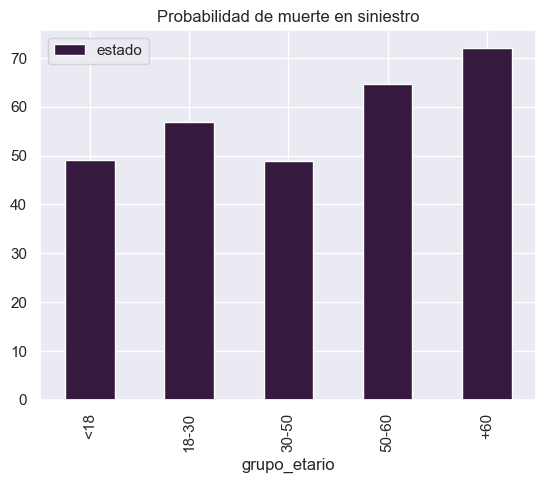

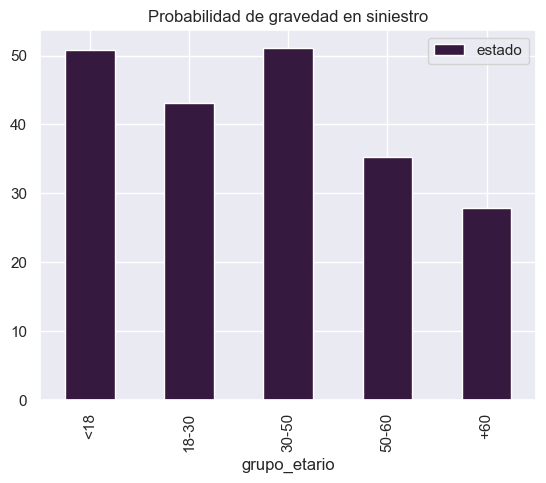

In [33]:
(combined_df[combined_df['estado']=='muerte'].groupby('grupo_etario').count()  / combined_df.groupby('grupo_etario').count() * 100).plot.bar(title='Probabilidad de muerte en siniestro')


(combined_df[combined_df['estado']=='GRAVE'].groupby('grupo_etario').count()  / combined_df.groupby('grupo_etario').count() * 100).plot.bar(title='Probabilidad de gravedad en siniestro')


plt.show()

Como podemos apreciar, los adultos mayores tienen unas altas chances (70%) de fallecer en un siniestro por lo que son las victimas con mayor tasa de mortalidad por edad 

## Gravedad de los accidentes

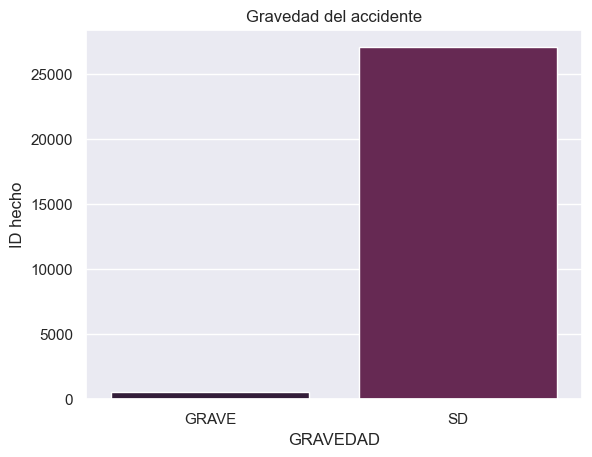

In [34]:
lesiones_victimas['GRAVEDAD'] = lesiones_victimas['GRAVEDAD'].replace('sd', 'SD')
lesiones_victimas['GRAVEDAD'] = lesiones_victimas['GRAVEDAD'].replace('grave', 'GRAVE')


sns.barplot(data=lesiones_victimas.groupby('GRAVEDAD').count().reset_index(), 
            x='GRAVEDAD', y='ID hecho')
plt.title('Gravedad del accidente')
plt.show()

Vemos que en este caso, tenemos demasiados datos faltantes por lo que no podemos generar un analisis correcto

## Mapa de hechos

### Distribucion de siniestros por comuna

In [45]:
lesiones.rename(columns={
    'latitud': 'pos y',
    'longitud': 'pos x'
}, inplace=True)

df1 = lesiones[~lesiones['pos y'].apply(lambda x: x=='.')][['comuna','pos y', 'pos x']]
df1 = df1[['comuna','pos y', 'pos x']].replace('SD', None).dropna()
df1[['pos y', 'pos x']] = df1[['pos y', 'pos x']].astype(float)
df1['tipo_siniestro'] = 'lesion'

df2 = homicidios[~homicidios['pos x'].apply(lambda x: x=='.')][['comuna','pos x', 'pos y']]
df2['tipo_siniestro'] = 'muerte'

combined_df = pd.concat([df1,df2])


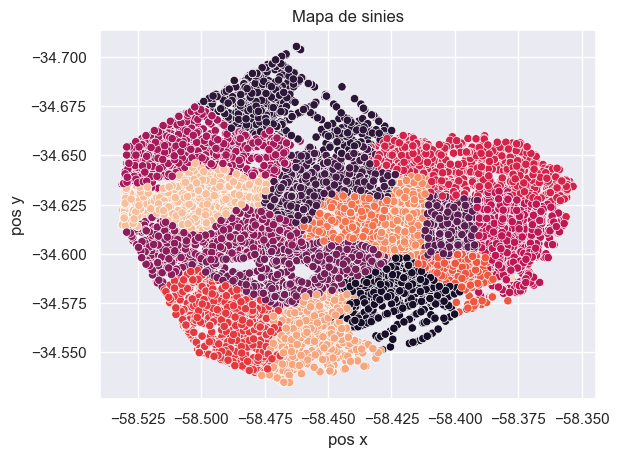

In [46]:
plt.title('Mapa de sinies')
sns.scatterplot(data=combined_df, x='pos x', y='pos y', hue='comuna',palette='rocket', legend=False)

plt.show()

### Por hecho

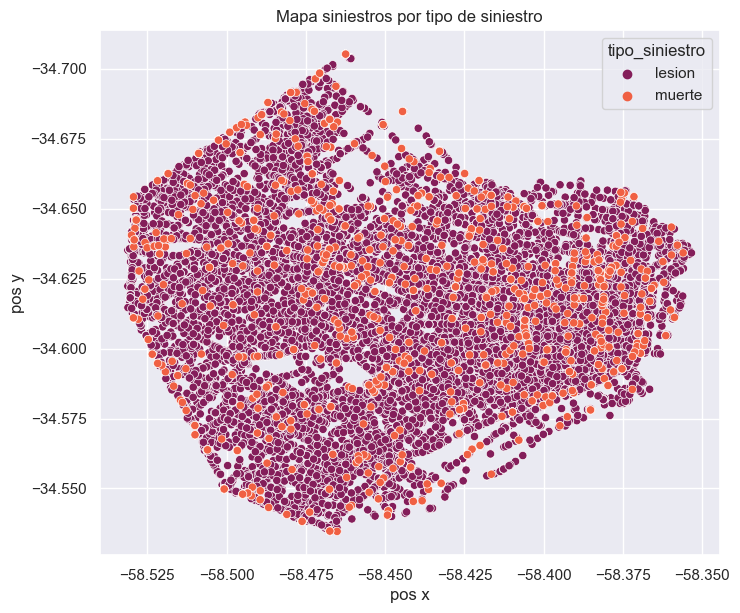

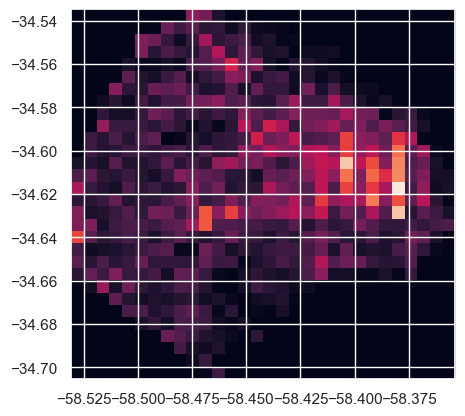

In [47]:
plt.figure(figsize=(8,15))
plt.subplot(2,1,1)
plt.title('Mapa siniestros por tipo de siniestro')
sns.scatterplot(data=combined_df,
               x='pos x',
               y='pos y', hue='tipo_siniestro', palette='rocket')
plt.show()

plt.subplot(2,1,2)
x= combined_df['pos x'].values.astype(float)
y= combined_df['pos y'].values.astype(float)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=30)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.title('Mapa de calor de siniestros')
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

El segundo mapa de calor nos demuestra que la mayoria de los siniestros se ocasionan en las zonas centricas de la ciudad dado al alto transito que estas poseen

In [48]:
sensores = pd.read_csv('datasets/sensores.csv')
sensores = sensores[['pos x', 'pos y']]

semaforos = pd.read_csv('datasets/semaforos.csv')
semaforos = semaforos[['pos x', 'pos y']]

camaras_fijas = pd.read_csv('datasets/camaras_fijas_control_vehicular.csv')
camaras_fijas = camaras_fijas[['pos x', 'pos y']]


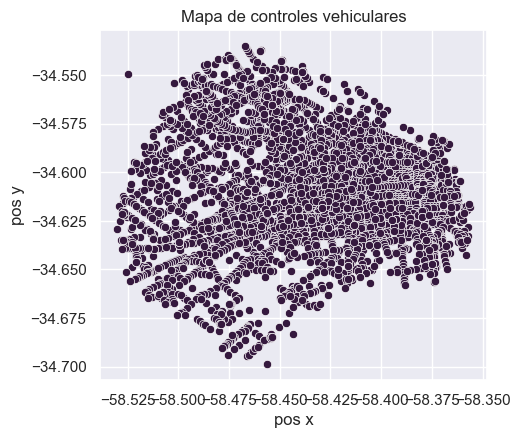

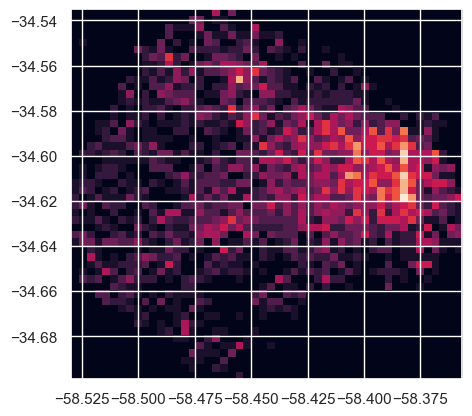

In [49]:
metodos_precaucion_coords = pd.concat([sensores, semaforos, camaras_fijas])
metodos_precaucion_coords.drop(metodos_precaucion_coords[metodos_precaucion_coords['pos y']>-33.8].index,inplace=True)


plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.title('Mapa de controles vehiculares')
sns.scatterplot(data=metodos_precaucion_coords,
               x='pos x',
               y='pos y')
plt.show()

#Mapa de calor
x= metodos_precaucion_coords['pos x'].values
y= metodos_precaucion_coords['pos y'].values

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.subplot(2,1,2)
plt.title('Mapa de calor de control vehicular')
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')

plt.show()

Estos mapas nos permiten observar que la presencia de distintos controles de trafico se ubican en la misma zona la cual posee mayor cantidad de siniestros. Por lo que podemos descartar esto como causalidad principal de siniestros viales